In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
data_train=pd.read_csv("Data/bostonhousingtrain.csv")
data_test=pd.read_csv("Data/bostonhousingtrain.csv")
del data_train['ID']
del data_test['ID']
data_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 36.5 KB


In [4]:
data_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


The data looks good. Lets visualize our data

In [5]:
X_train=data_train[data_train.columns[:13]]
y_train=data_train['medv']
X_test=data_test[data_train.columns[:13]]
y_test=data_test['medv']

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(333, 13)
(333, 13)
(333,)
(333,)


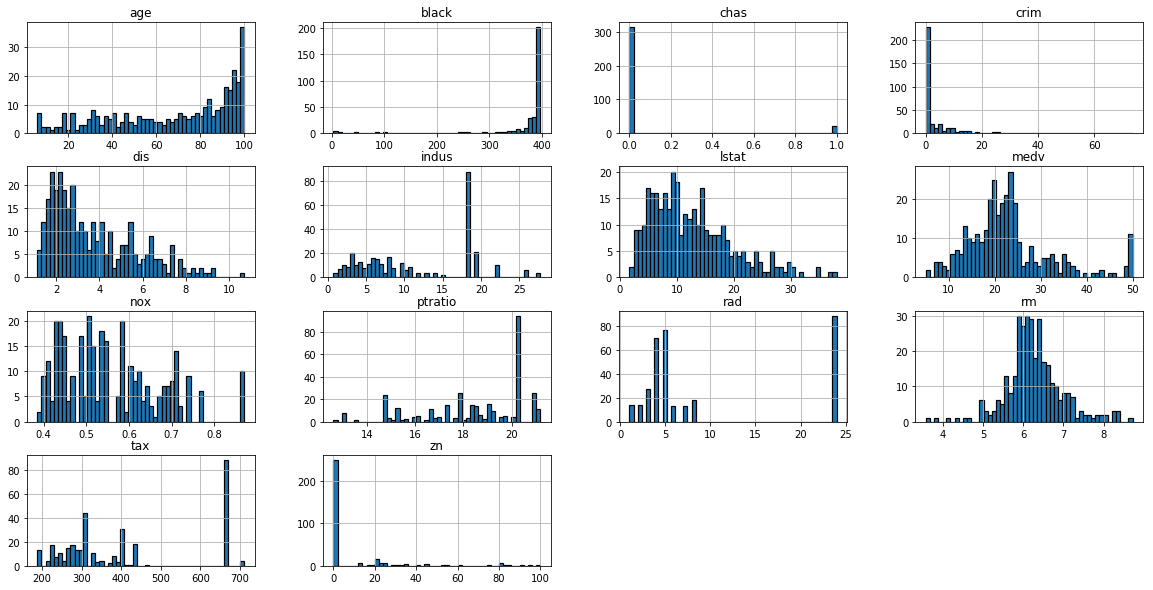

In [29]:
data_train.hist(bins=50,edgecolor='black',figsize=(20,15), linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,10)

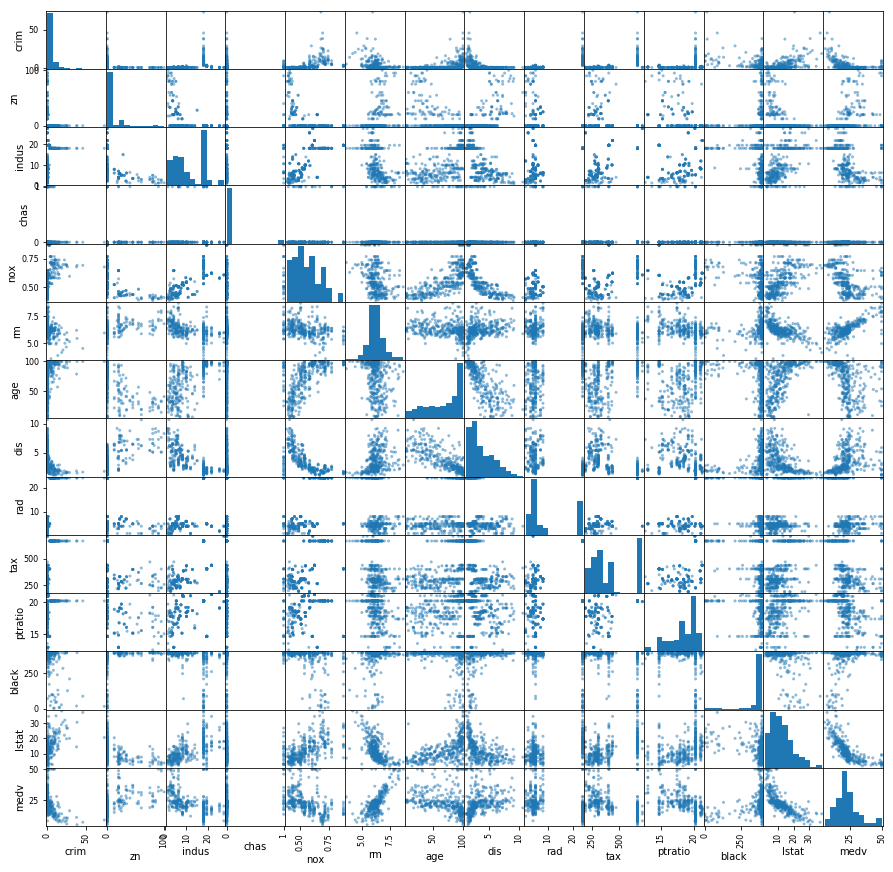

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_train,figsize=(15,15))
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
# make predictions
y_pred =reg.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.7331394355527803

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

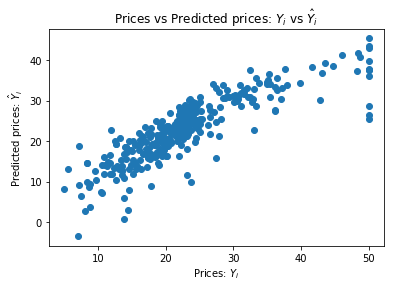

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

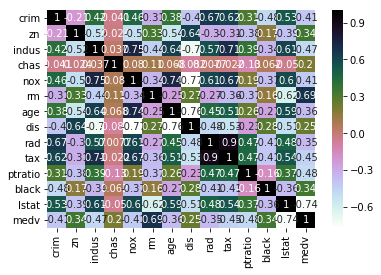

In [16]:
sns.heatmap(data_train.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [27]:
#feature Selection tests
from sklearn.feature_selection import f_regression, mutual_info_regression,RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
f_test, _ = f_regression(X_train, y_train)
mi = mutual_info_regression(X_train, y_train)
estimator = LinearRegression()
selector = RFE(estimator)
selector = selector.fit(X_train, y_train)
rfr= RandomForestRegressor().fit(X_train, y_train)
etr= ExtraTreesRegressor().fit(X_train, y_train)
df=pd.DataFrame()
df['features']=data_train.columns[:-1]
df['f_test']=f_test
df['mir']=mi
df['RFE']=selector.ranking_
df['rfr']=rfr.feature_importances_
df['etr']=etr.feature_importances_
df

,features,f_test,mir,RFE,rfr,etr
0,crim,65.891548,0.309030,3,0.039586,0.038610
1,zn,44.673597,0.163236,5,0.000653,0.001856
2,indus,95.882789,0.454301,4,0.003917,0.076882
3,chas,14.430449,0.010269,1,0.000334,0.007018
4,nox,68.090283,0.410860,1,0.009515,0.028298
5,rm,300.131996,0.507304,1,0.427412,0.332725
6,age,48.936067,0.333297,8,0.013702,0.024782
7,dis,21.958038,0.321872,1,0.073814,0.034990
8,rad,46.888669,0.215633,2,0.004732,0.007714
9,tax,83.150494,0.336781,6,0.018676,0.021860


In [ ]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

In [ ]:
data2=data[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
from sklearn.preprocessing import StandardScaler #Standardisation
features=data2[data2.columns[:4]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
x=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])
x['Outcome']=data2['Outcome']
outcome=x['Outcome']
train1,test1=train_test_split(x,test_size=0.25,random_state=0,stratify=x['Outcome'])
train_X1=train1[train1.columns[:4]]
test_X1=test1[test1.columns[:4]]
train_Y1=train1['Outcome']
test_Y1=test1['Outcome']